# Simple Message Board

## Introduction

This website is used to verify the following vulnerabilities:

1.Reflected XSS: The message preview feature has a reflected XSS vulnerability, as the interface directly outputs unfiltered HTML code.

2.Stored XSS: The message board allows users to post and display messages with a stored XSS vulnerability. The interface that posts messages does not filter user input. Besides, the JavaScript code that displays messages does not escape the content, resulting in the injection of malicious code into the public message board.

To make the demo easy, we use Docker Compose for arranging the project, so it can make one click fast startup for the example environment.

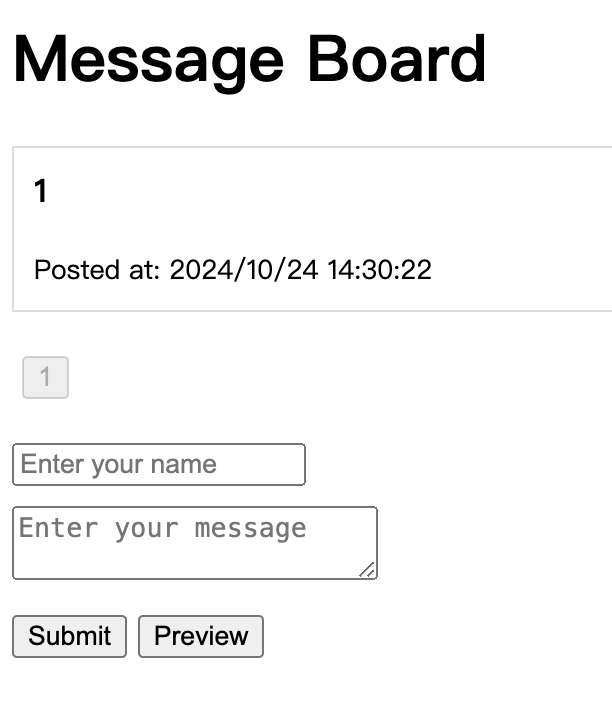

## Environment Requirements

1. Docker
2. Docker Compose (version >= `3.9`)
3. Python (version >= `3.8`)


## Project Structure

- `controllers/`: The controllers of server
- - `controllers/messages.js`: The `messages` controller of server
- `data/`: The directory for data
- `data/messages.db`: The database file for messages
- `node_modules/`: The dependencies of Node.js
- `app.js`: The `entry` source code of the server
- `package.json` or `package-json.json`: The description file for Node.js

## Run the server

The example is constructed by docker compose. So it is quiet easy to run the server.

```bash
docker-compose up --build -d
```

> The server will build and run in the background.


In [ ]:
!docker-compose up --build -d

The port of the example server is `3000`.

You can broswer the index page of the example server.

## Test Cases

### Case 1: Reflected XSS

Step 1: Access the index page of the server.

In [ ]:
!open http://localhost:3000

Step 2: Input the following payload in the message input box.

```html
<script>alert('Hello World')</script>
```

Step 3: Click the `Preview` button.

Step 4: Check the vulnerability.

You can see the alert window in the preview page. That means the reflected XSS has been exploited.

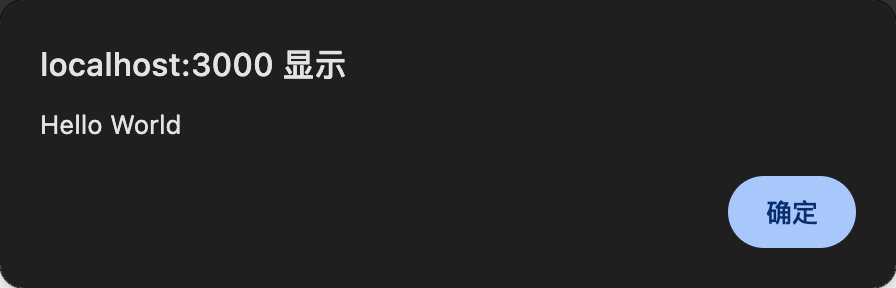

## Test Case 2: Stored XSS

Step 1: Access the index page of the server.

Step 2: Input the following payload in the message input box.

```html
<script>alert('Hello World')</script>
```

Step 3: Click the `Submit` button.

Step 4: Check the vulnerability.

You can see the alert window in the message board. That means the stored XSS has been exploited.

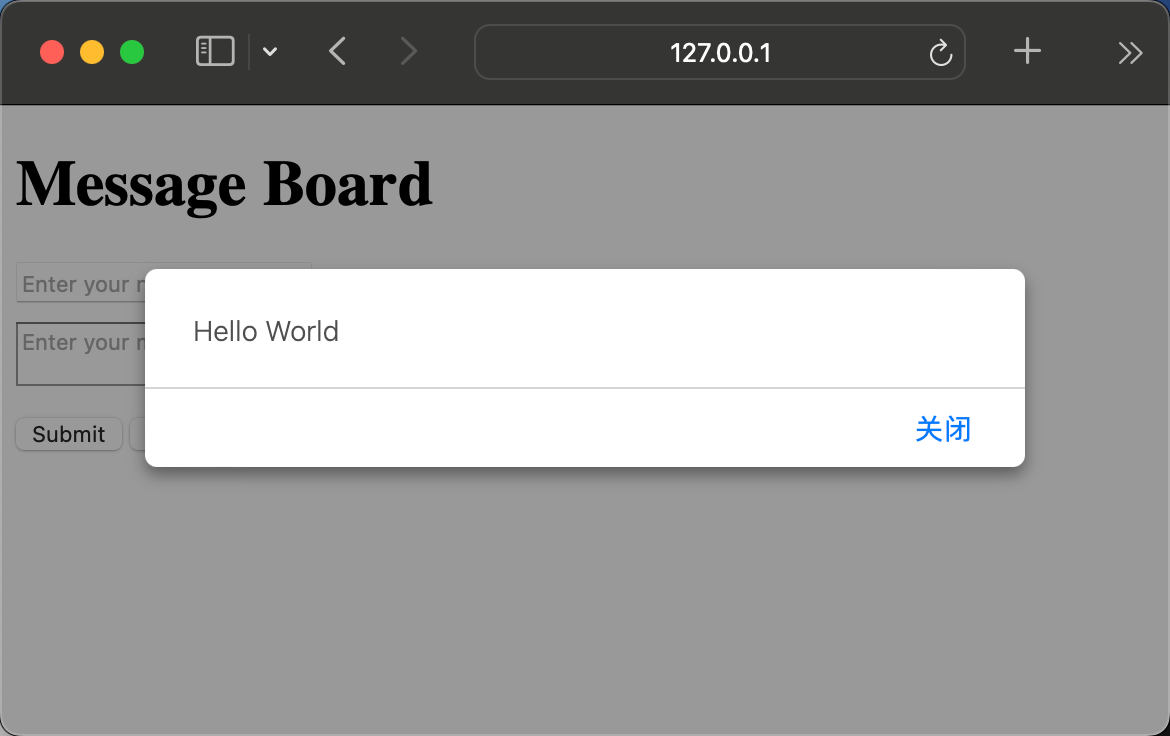

# How to prevent

## Case 1: Reflected XSS

This test case implements a secure XSS filter to handle user input and prevent the vulnerability. Specifically, the "preview (new)" function will filter the parameter "message" using the `sanitize-html` library in Node.js. The server will only output the sanitized message.

```javascript
const previewMessage2 = async (ctx) => {
    const { author, content } = ctx.query;
    
    // Sanitize HTML options
    const options = {
        allowedTags: [ 'b', 'i', 'em', 'strong', 'a' ],
        allowedAttributes: {
            'a': [ 'href' ]
        },
        allowedSchemes: [ 'http', 'https' ]
    };

    // Sanitize both author and content
    const sanitizedAuthor = sanitizeHtml(author || '', {
        ...options,
        allowedTags: []
    });
    
    const sanitizedContent = sanitizeHtml(content || '', options);

    await ctx.render('preview2', {
        author: sanitizedAuthor,
        content: sanitizedContent,
        preview_time: new Date().toISOString()
    });
};
```

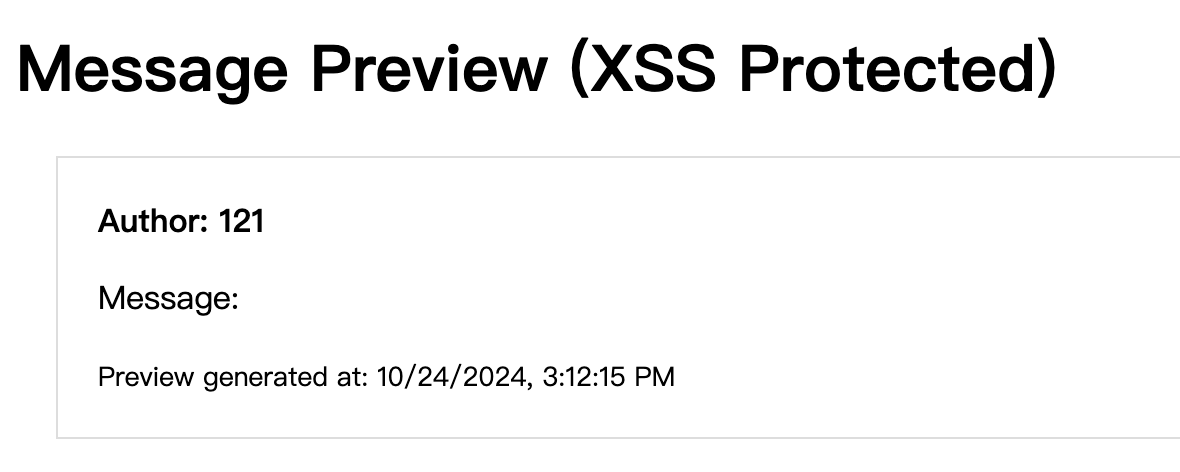

You can not see the alert window in the preview page. That means the reflected XSS has been prevented.

## Case 2: Stored XSS

This test case employs HTML escaping to prevent the vulnerability. Specifically,  use the function "text" of jQuery to output messages to the page instead of the function "html" in the message board page.

In [ ]:
!open http://localhost:3000/new

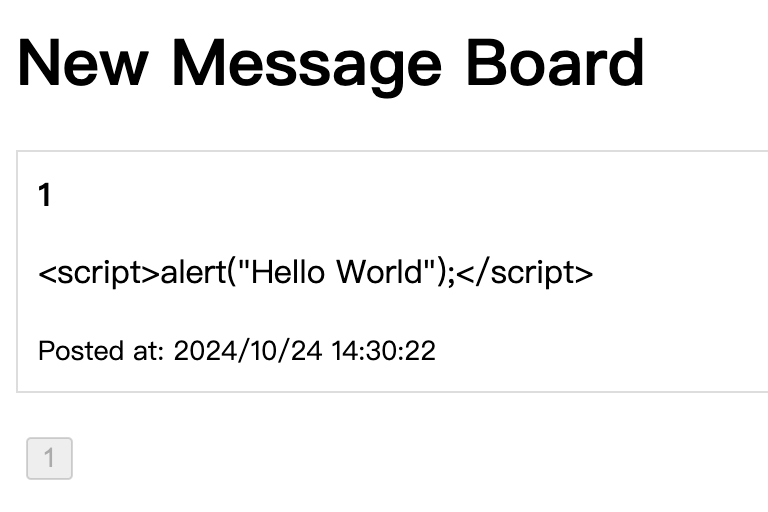

You can not see the alert window in the message board. And the code can be seen in the board. That means the stored XSS has been prevented.